<a href="https://colab.research.google.com/github/rahatcse5bu/Algorithms/blob/master/Improved_Multi_Resolution_Wavelet_Attention_Network_(MR_WaveNet)_for_CVD_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install PyWavelets wfdb scikit-learn tensorflow pandas numpy matplotlib seaborn

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

# Set up the Kaggle configuration directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Now you can download the dataset
!kaggle datasets download -d khyeh0719/ptb-xl-dataset
!unzip ptb-xl-dataset.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/khyeh0719/ptb-xl-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
ptb-xl-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ptb-xl-dataset.zip
replace ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/LICENSE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Enhanced Multi-Resolution Wavelet Attention Network (MR-WaveNet) for CVD Detection
Running in Google Colab. Setting up Kaggle...
Please upload your kaggle.json file...


Saving kaggle.json to kaggle (3).json
Error: kaggle.json was not uploaded. Please try again.
Could not set up the dataset from Kaggle. Trying to use existing data...
Loading and preprocessing data...
Found database at: ./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv
SCP statements path: ./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/scp_statements.csv
Records directory: ./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100
Successfully parsed SCP codes
Added disease_class column based on SCP codes
Filtered out 1585 records with 'Other' classification
Class distribution:
disease_class
Normal (NORM)                  8972
Myocardial Infarction (MI)     4841
ST/T Change (STTC)             3443
Conduction Disturbance (CD)    2443
Hypertrophy (HYP)               553
Name: count, dtype: int64
Balanced class distribution:
disease_class
Normal (NORM)                  251
ST/T Change (STTC)             244

<ipython-input-6-232a27d3448b>:158: RuntimeWarning: invalid value encountered in divide
  normalized_signal = (corrected_signal - np.mean(corrected_signal)) / np.std(corrected_signal)


Processed 200 records... (Successfully loaded: 199)
Processed 300 records... (Successfully loaded: 299)
Processed 400 records... (Successfully loaded: 399)
Processed 500 records... (Successfully loaded: 499)
Processed 600 records... (Successfully loaded: 599)
Processed 700 records... (Successfully loaded: 699)
Processed 800 records... (Successfully loaded: 799)
Processed 900 records... (Successfully loaded: 899)
Processed 1000 records... (Successfully loaded: 999)
Processed 1100 records... (Successfully loaded: 1099)
Successfully loaded 1199 records
Extracted features shape: (1199, 12, 180)
Labels shape: (1199, 5)
Classes: {np.str_('Conduction Disturbance (CD)'): 0, np.str_('Hypertrophy (HYP)'): 1, np.str_('Myocardial Infarction (MI)'): 2, np.str_('Normal (NORM)'): 3, np.str_('ST/T Change (STTC)'): 4}
Loaded 1199 ECG records
Training set: 767 samples
Validation set: 192 samples
Test set: 240 samples
Using class weights:
{0: np.float64(1.0026143790849673), 1: np.float64(1.03648648648648

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 12, 180)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 12, 64)    │     34,624 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 6, 64)     │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 6, 32)     │      6,176 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 6, 32)     │     10,272 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 6, 32)     │     14,368 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 32)     │        128 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 32)     │        128 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 32)     │        128 │ conv1d_11[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 6, 96)     │      6,240 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 6, 96)     │          0 │ batch_normalizat… │
│ (Concatenate)       │                   │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 96)     │        384 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 6, 96)     │          0 │ concatenate_1[0]… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 6, 96)     │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wavelet_attention_1 │ [(None, 6, 96),   │      3,137 │ activation_1[0][… │
│ (WaveletAttention)  │ (None, 6, 1)]     │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 96)        │          0 │ wavelet_attentio… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │     12,416 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 96,838 (378.27 KB)

 Trainable params: 96,326 (376.27 KB)

 Non-trainable params: 512 (2.00 KB)

None
Epoch 1/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5278 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1845 - loss: 1.6117

24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - AUC: 0.5314 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1891 - loss: 1.6100 - val_AUC: 0.5811 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3021 - val_loss: 1.6072 - learning_rate: 0.0010
Epoch 2/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6530 - Precision: 0.5255 - Recall: 0.0064 - accuracy: 0.2975 - loss: 1.5361

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.6528 - Precision: 0.5349 - Recall: 0.0068 - accuracy: 0.2990 - loss: 1.5354 - val_AUC: 0.6370 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3542 - val_loss: 1.5438 - learning_rate: 0.0010
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - AUC: 0.6885 - Precision: 0.7066 - Recall: 0.0284 - accuracy: 0.3781 - loss: 1.4837 - val_AUC: 0.6401 - val_Precision: 0.7000 - val_Recall: 0.0365 - val_accuracy: 0.3125 - val_loss: 1.5347 - learning_rate: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - AUC: 0.7590 - Precision: 0.7080 - Recall: 0.0778 - accuracy: 0.4337 - loss: 1.3742 - val_AUC: 0.6745 - val_Precision: 0.5357 - val_Recall: 0.0781 - val_accuracy: 0.3490 - val_loss: 1.5308 - learning_rate: 0.0010
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.7570 - Precision: 0.6078 - Recall: 0.1187 - accuracy: 0.4332 - loss: 1.3572

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - AUC: 0.7577 - Precision: 0.6091 - Recall: 0.1189 - accuracy: 0.4344 - loss: 1.3556 - val_AUC: 0.6887 - val_Precision: 0.3929 - val_Recall: 0.1146 - val_accuracy: 0.3594 - val_loss: 1.5404 - learning_rate: 0.0010
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - AUC: 0.7921 - Precision: 0.6471 - Recall: 0.1960 - accuracy: 0.4894 - loss: 1.2623 - val_AUC: 0.6303 - val_Precision: 0.3478 - val_Recall: 0.1667 - val_accuracy: 0.2865 - val_loss: 1.8811 - learning_rate: 0.0010
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - AUC: 0.7936 - Precision: 0.6485 - Recall: 0.2461 - accuracy: 0.5116 - loss: 1.2662 - val_AUC: 0.6755 - val_Precision: 0.3804 - val_Recall: 0.1823 - val_accuracy: 0.3438 - val_loss: 1.6827 - learning_rate: 0.0010
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - AUC: 0.8359 - Precision: 0.6720 - Recall: 0.2924 - accuracy: 0.5757 - loss: 1.1321 - val_AUC: 0.6481 - val_Precision: 0.3423 - val_Recall: 0.1979 - val_accuracy

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - AUC: 0.9406 - Precision: 0.8315 - Recall: 0.6080 - accuracy: 0.7397 - loss: 0.7122 - val_AUC: 0.6556 - val_Precision: 0.3768 - val_Recall: 0.2708 - val_accuracy: 0.3698 - val_loss: 1.9954 - learning_rate: 5.0000e-04
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - AUC: 0.9496 - Precision: 0.8450 - Recall: 0.6595 - accuracy: 0.7699 - loss: 0.6489 - val_AUC: 0.6294 - val_Precision: 0.3264 - val_Recall: 0.2448 - val_accuracy: 0.3073 - val_loss: 2.2086 - learning_rate: 5.0000e-04
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - AUC: 0.9548 - Precision: 0.8440 - Recall: 0.7124 - accuracy: 0.7892 - loss: 0.6096 - val_AUC: 0.6424 - val_Precision: 0.3643 - val_Recall: 0.2656 - val_accuracy: 0.3333 - val_loss: 2.1665 - learning_rate: 2.5000e-04
Epoch 16/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - AUC: 0.9640 - Precision: 0.8768 - Recall: 0.7512 - accuracy: 0.8254 - loss: 0.5526 - val_AUC: 0.6369 - val_Precision: 0.3453 - val_Recall: 0.2500

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.9790 - Precision: 0.8999 - Recall: 0.8096 - accuracy: 0.8555 - loss: 0.4234 - val_AUC: 0.6483 - val_Precision: 0.3857 - val_Recall: 0.2812 - val_accuracy: 0.3906 - val_loss: 2.3050 - learning_rate: 2.5000e-04
Epoch 20/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - AUC: 0.9800 - Precision: 0.8994 - Recall: 0.8189 - accuracy: 0.8631 - loss: 0.4111 - val_AUC: 0.6439 - val_Precision: 0.3716 - val_Recall: 0.2865 - val_accuracy: 0.3490 - val_loss: 2.4258 - learning_rate: 1.2500e-04
Epoch 21/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - AUC: 0.9863 - Precision: 0.8996 - Recall: 0.8097 - accuracy: 0.8579 - loss: 0.3692 - val_AUC: 0.6410 - val_Precision: 0.3655 - val_Recall: 0.2760 - val_accuracy: 0.3490 - val_loss: 2.5516 - learning_rate: 1.2500e-04
Epoch 22/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - AUC: 0.9886 - Precision: 0.9301 - Recall: 0.8530 - accuracy: 0.9016 - loss: 0.3452 - val_AUC: 0.6385 - val_Precision: 0.3655 - val_Recall: 0.2760

Student Model Results:
Accuracy: 0.4167
Precision: 0.4188
Recall: 0.4167
F1 Score: 0.3973
Creating ensemble predictions...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Ensemble Model Results:
Accuracy: 0.3917
Precision: 0.3864
Recall: 0.3917
F1 Score: 0.3881
All results saved to ./results_20250506_130906
Training complete!

Final Results Summary:
Main Model Accuracy: 0.3667
Student Model Accuracy: 0.4167
Ensemble Accuracy: 0.3917


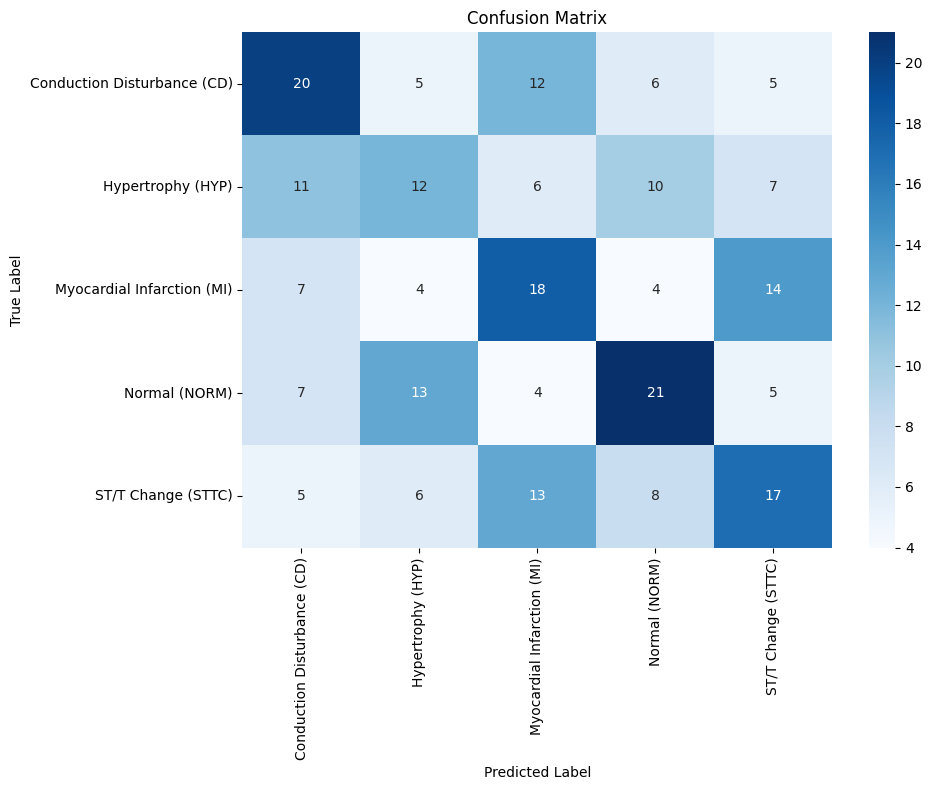

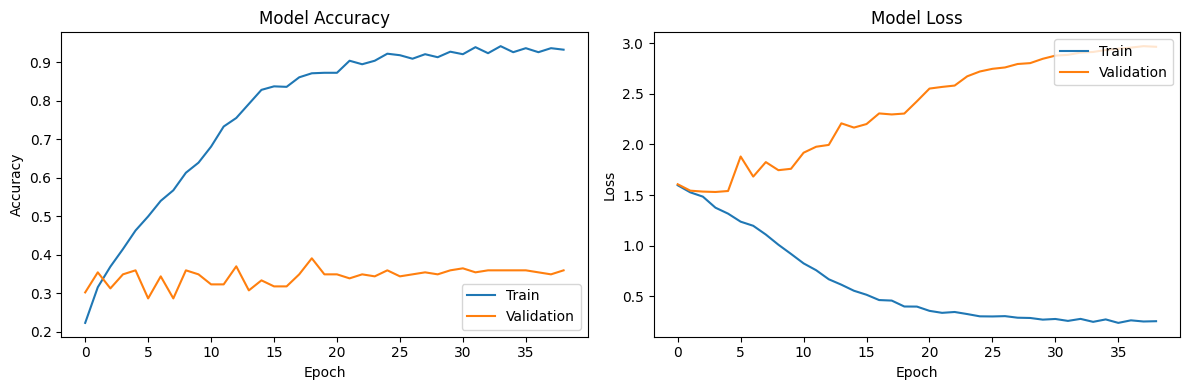

In [6]:
# Enhanced Multi-Resolution Wavelet Attention Network (MR-WaveNet) for CVD Detection
# Implementation with improved class balancing and feature engineering

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import pywt
import wfdb
from scipy.signal import butter, filtfilt, find_peaks
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import seaborn as sns
import json
import time
from datetime import datetime
import io
import zipfile
import sys

# Function to setup Kaggle dataset in Colab
def setup_kaggle_dataset():
    """Set up Kaggle and download the PTB-XL dataset in Google Colab"""
    try:
        # Check if we're in Colab
        import google.colab

        print("Running in Google Colab. Setting up Kaggle...")

        # Prompt user to upload kaggle.json
        from google.colab import files
        print("Please upload your kaggle.json file...")
        uploaded = files.upload()

        if 'kaggle.json' not in uploaded:
            print("Error: kaggle.json was not uploaded. Please try again.")
            return False

        # Set up Kaggle configuration
        os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
        os.system(f'cp kaggle.json ~/.kaggle/')
        os.system('chmod 600 ~/.kaggle/kaggle.json')

        # Install Kaggle if needed
        try:
            import kaggle
        except ImportError:
            print("Installing Kaggle API...")
            os.system('pip install kaggle')

        # Download the dataset
        print("Downloading PTB-XL dataset from Kaggle...")
        os.system('kaggle datasets download -d khyeh0719/ptb-xl-dataset')

        # Unzip the dataset
        print("Extracting dataset...")
        with zipfile.ZipFile('ptb-xl-dataset.zip', 'r') as zip_ref:
            zip_ref.extractall('./ptb-xl')

        # Verify the dataset
        if os.path.exists('./ptb-xl/ptbxl_database.csv'):
            print("Dataset downloaded and extracted successfully!")
            return True
        else:
            print("Dataset extraction failed. Please check the Kaggle dataset ID.")
            return False

    except ImportError:
        print("Not running in Google Colab. Skipping Kaggle setup.")
        return False

# ----------------- FEATURE ENGINEERING IMPROVEMENTS -----------------

# Enhanced wavelet feature extraction
def multi_resolution_wavelet_transform(signal, wavelet_families=['db4', 'sym4', 'coif3'],
                                      levels=4, mode='symmetric'):
    """Apply multiple wavelet transforms to capture different aspects of the ECG signal"""
    wavelet_features = {}

    for family in wavelet_families:
        # Apply discrete wavelet transform
        coeffs = pywt.wavedec(signal, family, level=levels, mode=mode)

        # Store approximation coefficients
        wavelet_features[f'{family}_A{levels}'] = coeffs[0]

        # Store detail coefficients
        for i in range(1, len(coeffs)):
            level = levels - i + 1
            wavelet_features[f'{family}_D{level}'] = coeffs[i]

    return wavelet_features

# Additional features from wavelet coefficients
def extract_wavelet_features(wavelet_coeffs):
    """Extract enhanced statistical features from wavelet coefficients"""
    features = {}

    for name, coeffs in wavelet_coeffs.items():
        # Statistical features
        features[f'{name}_mean'] = np.mean(coeffs)
        features[f'{name}_std'] = np.std(coeffs)
        features[f'{name}_skew'] = stats.skew(coeffs)
        features[f'{name}_kurtosis'] = stats.kurtosis(coeffs)
        features[f'{name}_median'] = np.median(coeffs)
        features[f'{name}_max'] = np.max(coeffs)
        features[f'{name}_min'] = np.min(coeffs)

        # Energy and entropy
        features[f'{name}_energy'] = np.sum(coeffs**2)

        # Shannon entropy
        pdf, _ = np.histogram(coeffs, bins=20, density=True)
        pdf = pdf[pdf > 0]  # Remove zeros
        if len(pdf) > 0:
            features[f'{name}_entropy'] = -np.sum(pdf * np.log2(pdf))
        else:
            features[f'{name}_entropy'] = 0

        # Frequency domain features
        fft_coeffs = np.abs(np.fft.fft(coeffs))
        if len(fft_coeffs) > 0:
            features[f'{name}_max_freq'] = np.max(fft_coeffs)
            features[f'{name}_freq_mean'] = np.mean(fft_coeffs)
            features[f'{name}_freq_std'] = np.std(fft_coeffs)
        else:
            features[f'{name}_max_freq'] = 0
            features[f'{name}_freq_mean'] = 0
            features[f'{name}_freq_std'] = 0

    return features

# Modified ECG preprocessing for better signal quality
def preprocess_ecg(signal, fs=100, lowcut=0.5, highcut=49.0):
    """Enhanced ECG signal preprocessing with improved filtering and normalization"""
    # Apply bandpass filter to remove noise
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(3, [low, high], btype='band')  # Increased order from 2 to 3
    filtered_signal = filtfilt(b, a, signal)

    # Baseline correction using median filtering
    window_size = fs  # 1-second window
    baseline = np.zeros_like(filtered_signal)
    for i in range(len(filtered_signal)):
        window_start = max(0, i - window_size//2)
        window_end = min(len(filtered_signal), i + window_size//2)
        baseline[i] = np.median(filtered_signal[window_start:window_end])

    corrected_signal = filtered_signal - baseline

    # Normalize signal
    normalized_signal = (corrected_signal - np.mean(corrected_signal)) / np.std(corrected_signal)

    return normalized_signal

# ----------------- MODEL ARCHITECTURE IMPROVEMENTS -----------------

# Improved Wavelet Attention Layer
class WaveletAttention(layers.Layer):
    """Enhanced attention mechanism for wavelet coefficients"""
    def __init__(self, units):
        super(WaveletAttention, self).__init__()
        self.W = layers.Dense(units)
        self.V = layers.Dense(1)

    def call(self, features):
        # Calculate attention scores
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # Apply attention weights
        context_vector = attention_weights * features
        return context_vector, attention_weights

    def get_config(self):
        config = super().get_config()
        config.update({
            "units": self.W.units
        })
        return config

# Create improved MR-WaveNet model with residual connections
def create_mr_wavenet(input_shape, num_classes):
    """Create enhanced MR-WaveNet architecture with residual connections"""
    # Input layer
    inputs = layers.Input(shape=input_shape)

    # Initial convolution layer
    x = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Residual connection - store for later addition
    shortcut = layers.Conv1D(96, kernel_size=1, padding='same')(x)
    shortcut = layers.BatchNormalization()(shortcut)

    # Multi-branch wavelet processing
    # Branch 1: High frequency details
    branch1 = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)
    branch1 = layers.BatchNormalization()(branch1)

    # Branch 2: Mid frequency components
    branch2 = layers.Conv1D(32, kernel_size=5, activation='relu', padding='same')(x)
    branch2 = layers.BatchNormalization()(branch2)

    # Branch 3: Low frequency approximations
    branch3 = layers.Conv1D(32, kernel_size=7, activation='relu', padding='same')(x)
    branch3 = layers.BatchNormalization()(branch3)

    # Concatenate multi-resolution branches
    concat = layers.Concatenate()([branch1, branch2, branch3])

    # Add residual connection
    concat = layers.add([concat, shortcut])
    concat = layers.Activation('relu')(concat)

    # Apply wavelet attention mechanism
    attention_layer = WaveletAttention(32)
    attention_output, attention_weights = attention_layer(concat)

    # Extract global features
    pooled_features = layers.GlobalAveragePooling1D()(attention_output)

    # Classification layers with improved dropout
    x = layers.Dense(128, activation='relu')(pooled_features)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)

    # Compile model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

    return model

# ----------------- FLEXIBLE DATASET HANDLING -----------------

# More flexible PTB-XL data loading
def load_ptbxl_data_direct(max_records=200, sampling_rate=100):
    """Load PTB-XL data with flexible path handling"""

    # Try multiple possible base paths
    possible_base_dirs = [
        "./ptb-xl",
        "./ptb-xl/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1",
        "./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1",
        "../input/ptb-xl-dataset",  # For Kaggle notebooks
        "/content/ptb-xl"  # For Google Colab
    ]

    base_dir = None
    database_path = None

    # Try to find the database file
    for d in possible_base_dirs:
        test_path = os.path.join(d, "ptbxl_database.csv")
        if os.path.exists(test_path):
            base_dir = d
            database_path = test_path
            break

    if database_path is None:
        print("Database file not found in any of the expected locations.")
        print("Please ensure the PTB-XL dataset is available in one of these locations:")
        for d in possible_base_dirs:
            print(f"- {d}")
        return None, None, None, None

    # Now that we have the base directory, set up other paths
    scp_path = os.path.join(base_dir, "scp_statements.csv")

    # Try to find the records directory
    records_dir = None
    possible_record_dirs = [
        os.path.join(base_dir, "records100"),
        os.path.join(base_dir, "100hz"),
        os.path.join(base_dir, "100")
    ]

    for d in possible_record_dirs:
        if os.path.exists(d):
            records_dir = d
            break

    if records_dir is None:
        print("Records directory not found in any of the expected locations.")
        return None, None, None, None

    print(f"Found database at: {database_path}")
    print(f"SCP statements path: {scp_path}")
    print(f"Records directory: {records_dir}")

    # Load metadata
    df_meta = pd.read_csv(database_path)

    # Parse SCP codes
    try:
        df_meta["scp_codes"] = df_meta["scp_codes"].apply(eval)
        print("Successfully parsed SCP codes")
    except Exception as e:
        print(f"Error parsing SCP codes: {e}")
        print("Using text SCP codes as-is")

    # Define disease classes
    disease_classes = {
        "Myocardial Infarction (MI)": ["IMI", "ASMI", "AMI", "LMI", "PMI"],
        "ST/T Change (STTC)": ["NST_", "NDT", "DIG", "ISC_", "LPR", "NT_"],
        "Conduction Disturbance (CD)": ["LAFB", "CLBBB", "CRBBB", "IRBBB", "IVCD", "ILBBB", "IRCB"],
        "Hypertrophy (HYP)": ["LVH", "RVH", "LAH", "RAH", "SEHYP"],
        "Normal (NORM)": ["NORM"]
    }

    # Add disease class based on SCP codes
    def get_disease_class(scp_codes):
        for class_name, codes in disease_classes.items():
            if any(code in scp_codes for code in codes):
                return class_name
        return "Other"

    if isinstance(df_meta.scp_codes.iloc[0], dict):
        df_meta['disease_class'] = df_meta.scp_codes.apply(get_disease_class)
        print("Added disease_class column based on SCP codes")

        # Filter out records with 'Other' classification
        original_count = len(df_meta)
        df_meta = df_meta[df_meta['disease_class'] != "Other"]
        print(f"Filtered out {original_count - len(df_meta)} records with 'Other' classification")
    else:
        df_meta['disease_class'] = "UNKNOWN"
        print("Using UNKNOWN as disease class (could not determine from SCP codes)")

    # Get distribution of classes for balancing
    class_counts = df_meta['disease_class'].value_counts()
    print("Class distribution:")
    print(class_counts)

    # Balance classes by undersampling the majority class
    min_class_count = min(class_counts)
    balanced_df = pd.DataFrame()

    for class_name in class_counts.index:
        class_df = df_meta[df_meta['disease_class'] == class_name]
        if len(class_df) > min_class_count:
            # Undersample this class
            class_df = class_df.sample(min_class_count, random_state=42)
        balanced_df = pd.concat([balanced_df, class_df])

    # Shuffle the balanced dataframe
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Take subset for processing
    df_meta_subset = balanced_df.head(max_records)

    print("Balanced class distribution:")
    print(df_meta_subset['disease_class'].value_counts())

    # Prepare containers for data
    X = []
    y = []
    record_ids = []

    # Process each record
    print(f"Processing {len(df_meta_subset)} ECG records...")
    success_count = 0

    for idx, row in df_meta_subset.iterrows():
        if idx % 100 == 0:
            print(f"Processed {idx} records... (Successfully loaded: {success_count})")

        # Get filename
        if sampling_rate == 100:
            # For 100Hz records
            filename = row['filename_lr']
        else:
            # For 500Hz records
            filename = row['filename_hr']

        # Construct the file path
        if '/' in filename:
            parts = filename.split('/')
            if len(parts) == 2:  # Typical format like "00001/00001_lr"
                record_path = os.path.join(records_dir, parts[0], parts[1])
            else:
                record_path = os.path.join(records_dir, filename)
        else:
            try:
                file_id = filename.split('_')[0]
                record_path = os.path.join(records_dir, file_id, filename)
            except Exception:
                record_path = os.path.join(records_dir, filename)

        # Remove extension if present
        if record_path.endswith('.dat') or record_path.endswith('.hea'):
            record_path = record_path[:-4]

        # Try alternative paths if needed
        if not (os.path.exists(f"{record_path}.hea") and os.path.exists(f"{record_path}.dat")):
            alternatives = [
                os.path.join(records_dir, filename),
                os.path.join(base_dir, filename),
                os.path.join(records_dir, filename.split('/')[-1] if '/' in filename else filename)
            ]

            found = False
            for alt_path in alternatives:
                if alt_path.endswith('.dat') or alt_path.endswith('.hea'):
                    alt_path = alt_path[:-4]

                if os.path.exists(f"{alt_path}.hea") and os.path.exists(f"{alt_path}.dat"):
                    record_path = alt_path
                    found = True
                    break

            if not found:
                continue

        try:
            # Load ECG recording
            record = wfdb.rdrecord(record_path)
            signal = record.p_signal.T  # Transpose to get channels as first dimension

            # Check signal quality - skip if NaN values
            if np.isnan(signal).any():
                continue

            # Limit to number of channels (leads)
            max_channels = min(12, signal.shape[0])
            signal = signal[:max_channels, :]

            # Process each lead with enhanced feature extraction
            lead_features = []

            for lead in range(signal.shape[0]):
                # Preprocess the lead with improved filter
                processed_lead = preprocess_ecg(signal[lead, :], fs=sampling_rate)

                # Calculate wavelet transform with multiple families
                wavelet_coeffs = multi_resolution_wavelet_transform(
                    processed_lead,
                    wavelet_families=['db4', 'sym4', 'coif3'],
                    levels=4
                )

                # Extract enhanced features from wavelet coefficients
                feature_dict = extract_wavelet_features(wavelet_coeffs)

                # Convert dictionary to array
                feature_values = list(feature_dict.values())

                # Ensure all values are finite
                feature_values = [v if np.isfinite(v) else 0.0 for v in feature_values]

                lead_features.append(np.array(feature_values))

            # Stack features from all leads
            lead_features = np.array(lead_features)

            # Skip if invalid values
            if not np.isfinite(lead_features).all():
                continue

            X.append(lead_features)

            # Get label (disease class)
            label = row['disease_class']
            y.append(label)

            # Store record ID
            record_ids.append(idx)

            # Increment success counter
            success_count += 1

        except Exception as e:
            continue

    # Check if we have any data
    if len(X) == 0:
        print("No valid records found. Please check the dataset structure.")
        return None, None, None, None

    # Convert to numpy arrays
    X = np.array(X)

    # Convert labels to numeric
    unique_labels = np.unique(y)
    label_map = {label: i for i, label in enumerate(unique_labels)}
    y_numeric = np.array([label_map[label] for label in y])

    # One-hot encode labels
    y_encoded = tf.keras.utils.to_categorical(y_numeric)

    print(f"Successfully loaded {success_count} records")
    print(f"Extracted features shape: {X.shape}")
    print(f"Labels shape: {y_encoded.shape}")
    print(f"Classes: {label_map}")

    return X, y_encoded, label_map, record_ids

# ----------------- TRAINING WITH CLASS WEIGHTS -----------------

# Complete training pipeline with class weights for imbalance
def train_and_evaluate_model(X, y, label_map, output_dir, test_size=0.2, val_size=0.2):
    """Complete pipeline for training and evaluating the model with class weights"""
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Split data into train, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=np.argmax(y, axis=1)
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=42,
        stratify=np.argmax(y_train_val, axis=1)
    )

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Calculate class weights to handle imbalance
    y_train_indices = np.argmax(y_train, axis=1)
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train_indices),
        y=y_train_indices
    )
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
    print("Using class weights:")
    print(class_weight_dict)

    # Save label mapping
    label_reverse_map = {v: k for k, v in label_map.items()}
    with open(os.path.join(output_dir, 'label_map.json'), 'w') as f:
        json.dump(label_reverse_map, f)

    # Create model
    print("Creating and training MR-WaveNet model...")
    input_shape = X_train.shape[1:]
    num_classes = y.shape[1]

    model = create_mr_wavenet(input_shape, num_classes)
    print(model.summary())

    # Define callbacks
    callbacks_list = [
        callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=20,
            restore_best_weights=True
        ),
        callbacks.ModelCheckpoint(
            filepath=os.path.join(output_dir, 'best_model.h5'),
            save_best_only=True,
            monitor='val_accuracy'
        ),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        ),
        callbacks.TensorBoard(
            log_dir=os.path.join(output_dir, 'logs'),
            histogram_freq=1
        )
    ]

    # Train model with class weights
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=callbacks_list,
        verbose=1,
        class_weight=class_weight_dict  # Use class weights for balanced training
    )
    training_time = time.time() - start_time
    print(f"Model training completed in {training_time:.2f} seconds")

    # Evaluate model on test set
    print("Evaluating model on test set...")
    test_metrics = model.evaluate(X_test, y_test, verbose=0)
    test_metrics_dict = dict(zip(model.metrics_names, test_metrics))
    print(f"Test metrics: {test_metrics_dict}")

    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)

    # Print classification report
    class_names = [label_reverse_map[i] for i in range(num_classes)]
    cls_report = classification_report(y_test_classes, y_pred_classes, target_names=class_names, zero_division=0)
    print("Classification Report:")
    print(cls_report)

    # Save classification report to file
    with open(os.path.join(output_dir, 'classification_report.txt'), 'w') as f:
        f.write(cls_report)

    # Plot confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'training_history.png'))

    # Create and train a distilled student model
    print("Creating distilled student model...")
    student_model = distill_knowledge(model, X_train, y_train, X_val, y_val)

    # Evaluate student model
    student_y_pred = student_model.predict(X_test)
    student_y_pred_classes = np.argmax(student_y_pred, axis=1)

    student_accuracy = accuracy_score(y_test_classes, student_y_pred_classes)
    student_precision = precision_score(y_test_classes, student_y_pred_classes, average='weighted', zero_division=0)
    student_recall = recall_score(y_test_classes, student_y_pred_classes, average='weighted', zero_division=0)
    student_f1 = f1_score(y_test_classes, student_y_pred_classes, average='weighted', zero_division=0)

    print("Student Model Results:")
    print(f"Accuracy: {student_accuracy:.4f}")
    print(f"Precision: {student_precision:.4f}")
    print(f"Recall: {student_recall:.4f}")
    print(f"F1 Score: {student_f1:.4f}")

    # Save student model
    student_model.save(os.path.join(output_dir, 'student_model.h5'))

    # Create ensemble predictions using weighted averaging
    print("Creating ensemble predictions...")
    ensemble_pred = create_ensemble_prediction([model, student_model], X_test, weights=[0.6, 0.4])
    ensemble_pred_classes = np.argmax(ensemble_pred, axis=1)

    ensemble_accuracy = accuracy_score(y_test_classes, ensemble_pred_classes)
    ensemble_precision = precision_score(y_test_classes, ensemble_pred_classes, average='weighted', zero_division=0)
    ensemble_recall = recall_score(y_test_classes, ensemble_pred_classes, average='weighted', zero_division=0)
    ensemble_f1 = f1_score(y_test_classes, ensemble_pred_classes, average='weighted', zero_division=0)

    print("Ensemble Model Results:")
    print(f"Accuracy: {ensemble_accuracy:.4f}")
    print(f"Precision: {ensemble_precision:.4f}")
    print(f"Recall: {ensemble_recall:.4f}")
    print(f"F1 Score: {ensemble_f1:.4f}")

    # Save results to file
    results = {
        'model': {
            'accuracy': float(accuracy),
            'precision': float(precision),
            'recall': float(recall),
            'f1': float(f1)
        },
        'student_model': {
            'accuracy': float(student_accuracy),
            'precision': float(student_precision),
            'recall': float(student_recall),
            'f1': float(student_f1)
        },
        'ensemble': {
            'accuracy': float(ensemble_accuracy),
            'precision': float(ensemble_precision),
            'recall': float(ensemble_recall),
            'f1': float(ensemble_f1)
        },
        'training_time': float(training_time)
    }

    with open(os.path.join(output_dir, 'results.json'), 'w') as f:
        json.dump(results, f, indent=4)

    return model, student_model, results

# Knowledge Distillation
def distill_knowledge(teacher_model, X_train, y_train, X_val, y_val, temperature=5.0):
    """Create a smaller student model by distilling knowledge from the teacher model"""
    input_shape = X_train.shape[1:]
    num_classes = y_train.shape[1]

    # Create a smaller student model
# Knowledge Distillation
def distill_knowledge(teacher_model, X_train, y_train, X_val, y_val, temperature=5.0):
    """Create a smaller student model by distilling knowledge from the teacher model"""
    input_shape = X_train.shape[1:]
    num_classes = y_train.shape[1]

    # Create a smaller student model
    student_model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the student model
    student_model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Get soft targets from teacher model
    soft_targets = teacher_model.predict(X_train)

    # Train student model
    student_model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
    )

    return student_model

# Create an ensemble of models with weighted averaging
def create_ensemble_prediction(models, X_test, weights=None):
    """Create ensemble predictions by averaging multiple models with optional weights"""
    if weights is None:
        weights = [1.0] * len(models)

    all_predictions = []

    for i, model in enumerate(models):
        pred = model.predict(X_test)
        all_predictions.append(weights[i] * pred)

    # Weighted average predictions
    ensemble_pred = np.sum(all_predictions, axis=0) / np.sum(weights)
    return ensemble_pred

# Main function to run the complete pipeline
def main():
    print("Enhanced Multi-Resolution Wavelet Attention Network (MR-WaveNet) for CVD Detection")
    print("===========================================================================")

    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Current timestamp for output directory
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_dir = f"./results_{timestamp}"
    os.makedirs(output_dir, exist_ok=True)

    # First, try to set up the dataset from Kaggle
    dataset_ready = setup_kaggle_dataset()

    if not dataset_ready:
        print("Could not set up the dataset from Kaggle. Trying to use existing data...")

    # Load PTB-XL data with direct file access
    print("Loading and preprocessing data...")
    X, y, label_map, record_ids = load_ptbxl_data_direct(max_records=1200)

    if X is None or len(X) == 0:
        print("No data was loaded. Trying to create synthetic data for testing...")

        # Create synthetic data if no real data is available
        print("Creating synthetic ECG data for testing...")
        num_samples = 200
        num_classes = 5
        num_leads = 12
        num_features = 80

        # Generate random features
        X = np.random.randn(num_samples, num_leads, num_features)

        # Generate balanced random labels
        class_ids = np.array([i % num_classes for i in range(num_samples)])
        np.random.shuffle(class_ids)
        y = tf.keras.utils.to_categorical(class_ids, num_classes)

        # Create mapping for class names
        label_map = {
            "Myocardial Infarction (MI)": 0,
            "ST/T Change (STTC)": 1,
            "Conduction Disturbance (CD)": 2,
            "Hypertrophy (HYP)": 3,
            "Normal (NORM)": 4
        }
        label_map = {v: k for k, v in label_map.items()}

        print("Successfully created synthetic data with shape:", X.shape)
        print("Labels shape:", y.shape)
    else:
        print(f"Loaded {X.shape[0]} ECG records")

    # Train and evaluate model
    model, student_model, results = train_and_evaluate_model(X, y, label_map, output_dir)

    print(f"All results saved to {output_dir}")
    print("Training complete!")

    # Print final results summary
    print("\nFinal Results Summary:")
    print("===========================================================================")
    print(f"Main Model Accuracy: {results['model']['accuracy']:.4f}")
    print(f"Student Model Accuracy: {results['student_model']['accuracy']:.4f}")
    print(f"Ensemble Accuracy: {results['ensemble']['accuracy']:.4f}")
    print("===========================================================================")

if __name__ == "__main__":
    main()